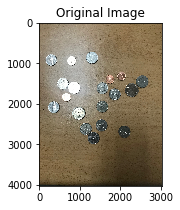

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# load the image
img = cv2.imread('resources/coin_4.jpg')
       
plt.rcParams['figure.figsize'] = (4,3)

# convert image color for display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

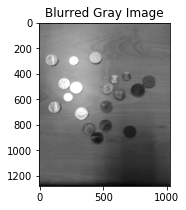

In [2]:
# gray scaled image and blurred image 
imS = cv2.resize(img, (1024, 1280))   
imS = cv2.medianBlur(imS,7)

# convert to gray
gray = cv2.cvtColor(imS, cv2.COLOR_BGR2GRAY)

# blur the image using gaussian blur
gray_blur = cv2.GaussianBlur(gray, (23, 23), 0)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(gray_blur, cmap='gray')
plt.title('Blurred Gray Image')
plt.show()

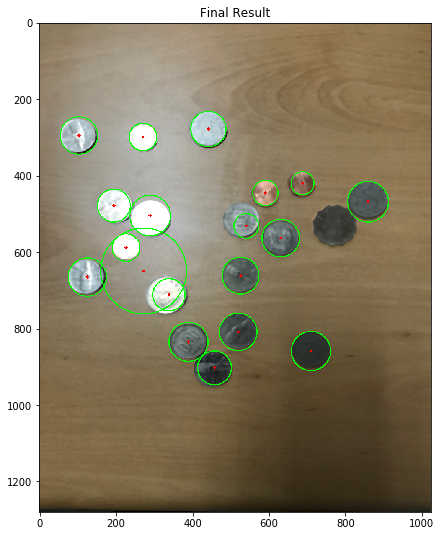

# coins : 19


In [3]:
# draw the circles
circles = cv2.HoughCircles(gray_blur,cv2.HOUGH_GRADIENT,1.1,70,param1=20,param2=45,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
n=1
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(imS,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(imS,(i[0],i[1]),2,(0,0,255),3)
    n+=1

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(imS, cv2.COLOR_BGR2RGB))
plt.title("Final Result")
plt.show()

print("# coins : " + str(circles.shape[1]))